# #Part II -- Apriori And FPGrowth algorithm

In [26]:
# Importing required modules-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the cleaned data-set after Preprocess-I


#Linux--
path = '~/Cleaned_data.csv'
data = pd.read_csv(path,engine='python')

#Windows-
# data=pd.read_csv("D:\DMDW project\scripts\Cleaned_data.csv")

In [3]:
data.head()

,name,generation,is_legendary,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,1,0,Grass,Poison,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0
1,Ivysaur,1,0,Grass,Poison,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0
2,Venusaur,1,0,Grass,Poison,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0
3,Mega,1,0,Grass,Poison,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0
4,Charmander,1,0,Fire,Normal,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0


In [4]:
data.shape

(1026, 14)

In [5]:
data.describe()

,generation,is_legendary,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed
count,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000
mean,4.032164,0.037037,1.272807,69.819688,436.933723,69.406433,80.080897,74.336257,72.669591,71.988304,68.452242
std,2.232780,0.188945,1.395257,129.266962,119.869757,25.766447,32.385186,30.833479,32.666489,27.540159,29.760936
min,1.000000,0.000000,0.100000,0.100000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,2.000000,0.000000,0.600000,8.825000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,4.000000,0.000000,1.000000,28.650000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000
75%,6.000000,0.000000,1.500000,69.550000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,8.000000,1.000000,20.000000,999.900000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


### #Distribution plots -

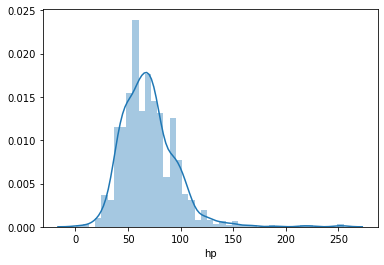

In [6]:
sns.distplot(data.hp)
plt.show()

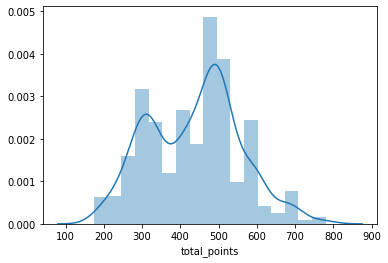

In [7]:
sns.distplot(data.total_points)
plt.show()

In [8]:
# Distributing pokemon according to their type
for pkm_type in data['type_1'].unique():
    data[pkm_type] = data[['type_1', 'type_2']].apply(lambda x: 1 if pkm_type in x.values else 0, axis = 1)

In [9]:
# function {summary} to summarise each stats according to each pokemon type-
def summary(stats):
    
    summary_stats = []
    for i, pkm_type in enumerate(data['type_1'].unique()):
        temp = data.loc[data[pkm_type]==1,stats].describe()
        temp.name = pkm_type
        summary_stats.append(temp)

    total_stats_summary = pd.concat(summary_stats, axis=1)
    
    print('Top types by average:')
    print(total_stats_summary.loc['mean'].sort_values(ascending=False).head(3))
    print(total_stats_summary.loc['50%'].sort_values(ascending=False).head(3))
        
    print('\nBottom types by average:')
    print(total_stats_summary.loc['mean'].sort_values(ascending=False).tail(3))
    print(total_stats_summary.loc['50%'].sort_values(ascending=False).tail(3))
    
    print('\nBiggest variance:')
    print(total_stats_summary.loc['std'].sort_values(ascending=False).head(3))
    
    plt_type=total_stats_summary.loc['mean'].sort_values(ascending=False).head(3).index.tolist()+total_stats_summary.loc['mean'].sort_values(ascending=False).tail(3).index.tolist()
    
    for i, pkm_type in enumerate(plt_type):
        sns.distplot(data.loc[data[pkm_type]==1,stats], label=pkm_type, hist=False)

##### #Plotting summary of 'total_points' attribute

Top types by average:
Dragon     531.140845
Steel      489.985915
Psychic    482.745614
Name: mean, dtype: float64
Dragon      540.0
Steel       495.0
Fighting    490.0
Name: 50%, dtype: float64

Bottom types by average:
Normal    409.467652
Poison    408.789474
Bug       383.855556
Name: mean, dtype: float64
Normal    418.0
Poison    405.0
Bug       395.0
Name: 50%, dtype: float64

Biggest variance:
Dragon     139.440443
Fairy      133.776759
Psychic    133.642093
Name: std, dtype: float64


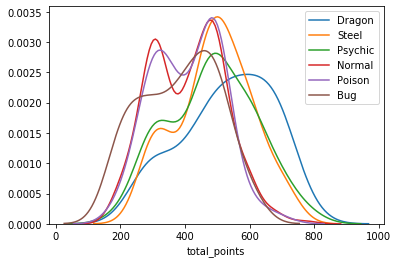

In [10]:
summary('total_points')

In [11]:
l=data['type_1'].values.tolist()
s=data['type_2'].values.tolist()
map(str,l)
map(str,s)
new_lst = [list(x) for x in zip(l, s)]
new_lst

[['Grass', 'Poison'],
 ['Grass', 'Poison'],
 ['Grass', 'Poison'],
 ['Grass', 'Poison'],
 ['Fire', 'Normal'],
 ['Fire', 'Normal'],
 ['Fire', 'Flying'],
 ['Fire', 'Dragon'],
 ['Fire', 'Flying'],
 ['Water', 'Normal'],
 ['Water', 'Normal'],
 ['Water', 'Normal'],
 ['Water', 'Normal'],
 ['Bug', 'Normal'],
 ['Bug', 'Normal'],
 ['Bug', 'Flying'],
 ['Bug', 'Poison'],
 ['Bug', 'Poison'],
 ['Bug', 'Poison'],
 ['Bug', 'Poison'],
 ['Normal', 'Flying'],
 ['Normal', 'Flying'],
 ['Normal', 'Flying'],
 ['Normal', 'Flying'],
 ['Normal', 'Normal'],
 ['Dark', 'Normal'],
 ['Normal', 'Normal'],
 ['Dark', 'Normal'],
 ['Normal', 'Flying'],
 ['Normal', 'Flying'],
 ['Poison', 'Normal'],
 ['Poison', 'Normal'],
 ['Electric', 'Normal'],
 ['Electric', 'Normal'],
 ['Electric', 'Normal'],
 ['Electric', 'Psychic'],
 ['Ground', 'Normal'],
 ['Ice', 'Steel'],
 ['Ground', 'Normal'],
 ['Ice', 'Steel'],
 ['Poison', 'Normal'],
 ['Poison', 'Normal'],
 ['Poison', 'Ground'],
 ['Poison', 'Normal'],
 ['Poison', 'Normal'],
 ['Pois

In [12]:
# transforming 'new_lst' into the right format via the TransactionEncoder()
te = TransactionEncoder()
te_ary = te.fit(new_lst).transform(new_lst)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1022,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1023,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1024,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False


# #Apriori algorithm-

In [13]:
# applying apriori on dataframe with min support 0.1%
apriori(df, min_support=0.001)

,support,itemsets
0,0.087719,(0)
1,0.067251,(1)
2,0.069201,(2)
3,0.070175,(3)
4,0.061404,(4)
...,...,...
133,0.001949,"(14, 15)"
134,0.008772,"(16, 14)"
135,0.005848,"(17, 14)"
136,0.006823,"(16, 15)"


In [15]:
# use_colnames=True to convert these integer values into the respective item names-
apriori(df, min_support=0.001, use_colnames=True)

,support,itemsets
0,0.087719,(Bug)
1,0.067251,(Dark)
2,0.069201,(Dragon)
3,0.070175,(Electric)
4,0.061404,(Fairy)
...,...,...
133,0.001949,"(Rock, Psychic)"
134,0.008772,"(Steel, Psychic)"
135,0.005848,"(Water, Psychic)"
136,0.006823,"(Steel, Rock)"


## #Selecting and Filtering Results-

In [14]:
# applying apriori to the dataframe and adding a new column that stores the length of each itemset
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087719,(Bug),1
1,0.067251,(Dark),1
2,0.069201,(Dragon),1
3,0.070175,(Electric),1
4,0.061404,(Fairy),1
...,...,...,...
133,0.001949,"(Psychic, Rock)",2
134,0.008772,"(Steel, Psychic)",2
135,0.005848,"(Psychic, Water)",2
136,0.006823,"(Steel, Rock)",2


In [15]:
## generating association rules from 'frequent_itemsets'
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.02)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bug),(Electric),0.087719,0.070175,0.003899,0.044444,0.633333,-0.002257,0.973072
1,(Electric),(Bug),0.070175,0.087719,0.003899,0.055556,0.633333,-0.002257,0.965944
2,(Bug),(Fairy),0.087719,0.061404,0.001949,0.022222,0.361905,-0.003437,0.959928
3,(Fairy),(Bug),0.061404,0.087719,0.001949,0.031746,0.361905,-0.003437,0.942192
4,(Bug),(Fighting),0.087719,0.068226,0.003899,0.044444,0.651429,-0.002086,0.975112
...,...,...,...,...,...,...,...,...,...
224,(Water),(Psychic),0.149123,0.111111,0.005848,0.039216,0.352941,-0.010721,0.925170
225,(Steel),(Rock),0.069201,0.073099,0.006823,0.098592,1.348732,0.001764,1.028280
226,(Rock),(Steel),0.073099,0.069201,0.006823,0.093333,1.348732,0.001764,1.026617
227,(Water),(Rock),0.149123,0.073099,0.010721,0.071895,0.983529,-0.000180,0.998703


In [16]:
# rule generation for frequent_itemsets-
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.02)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bug),(Electric),0.087719,0.070175,0.003899,0.044444,0.633333,-0.002257,0.973072
1,(Electric),(Bug),0.070175,0.087719,0.003899,0.055556,0.633333,-0.002257,0.965944
2,(Bug),(Fairy),0.087719,0.061404,0.001949,0.022222,0.361905,-0.003437,0.959928
3,(Fairy),(Bug),0.061404,0.087719,0.001949,0.031746,0.361905,-0.003437,0.942192
4,(Bug),(Fighting),0.087719,0.068226,0.003899,0.044444,0.651429,-0.002086,0.975112
...,...,...,...,...,...,...,...,...,...
224,(Water),(Psychic),0.149123,0.111111,0.005848,0.039216,0.352941,-0.010721,0.925170
225,(Steel),(Rock),0.069201,0.073099,0.006823,0.098592,1.348732,0.001764,1.028280
226,(Rock),(Steel),0.073099,0.069201,0.006823,0.093333,1.348732,0.001764,1.026617
227,(Water),(Rock),0.149123,0.073099,0.010721,0.071895,0.983529,-0.000180,0.998703


In [17]:
# checking if the rules satisfy the criteria and selecting the result
rules[ (rules['confidence'] > 0.2) &
       (rules['support'] > 0.001) ]
#s=rules[ (rules['confidence'] > 0.2) &
#       (rules['support'] > 0.001) ]
#s.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(Bug),(Normal),0.087719,0.52729,0.018519,0.211111,0.400370,-0.027735,0.599209
47,(Dark),(Normal),0.067251,0.52729,0.018519,0.275362,0.522221,-0.016943,0.652339
92,(Electric),(Normal),0.070175,0.52729,0.034113,0.486111,0.921904,-0.002890,0.919867
105,(Fairy),(Normal),0.061404,0.52729,0.023392,0.380952,0.722472,-0.008986,0.763608
119,(Fighting),(Normal),0.068226,0.52729,0.031189,0.457143,0.866966,-0.004786,0.870781
133,(Fire),(Normal),0.079922,0.52729,0.035088,0.439024,0.832604,-0.007054,0.842656
148,(Flying),(Normal),0.113060,0.52729,0.030214,0.267241,0.506820,-0.029401,0.645110
164,(Ghost),(Normal),0.064327,0.52729,0.013645,0.212121,0.402285,-0.020274,0.599978
176,(Grass),(Normal),0.114035,0.52729,0.043860,0.384615,0.729418,-0.016270,0.768153
188,(Ground),(Normal),0.077973,0.52729,0.017544,0.225000,0.426710,-0.023570,0.609948


# #FPGrowth algorithm

In [18]:
# Applying fpgrowth on the dataframe with min_support=0.1%
fpgrowth(df, min_support=0.001)

,support,itemsets
0,0.114035,(9)
1,0.074074,(13)
2,0.527290,(12)
3,0.079922,(6)
4,0.113060,(7)
...,...,...
133,0.005848,"(8, 10)"
134,0.001949,"(8, 17)"
135,0.003899,"(8, 16)"
136,0.011696,"(8, 9)"


In [19]:
# use_colnames=True to convert these integer values into the respective item names-
fpgrowth(df, min_support=0.001, use_colnames=True)

,support,itemsets
0,0.114035,(Grass)
1,0.074074,(Poison)
2,0.527290,(Normal)
3,0.079922,(Fire)
4,0.113060,(Flying)
...,...,...
133,0.005848,"(Ghost, Ground)"
134,0.001949,"(Ghost, Water)"
135,0.003899,"(Steel, Ghost)"
136,0.011696,"(Ghost, Grass)"


In [20]:
data[['type_1','type_2']].to_csv("D:\DMDW project\scripts\data.csv",index=False,header=None)

In [21]:
class fp_tree_node(object):
    def __init__(self, name_val, num_count, parentNode):
        self.name = name_val
        self.count = num_count
        self.parent = parentNode
        self.children = {}
        self.linknode = None
    def plus_count(self, num_count):
        self.count += num_count

    def print_tree(self, inx=1):
        print(
            ' '*inx, 'sno: {0}, name: {1}, count: {2}'.format(inx, self.name, self.count))

        for child in self.children.values():
            child.print_tree(inx + 1)

    def print_cond_tree(self, root):
        def print_result(node):
            if node.children:

                level_item = [str(node.name) + ' ' + str(node.count)]
                if len(list(node.children.items())) == 1:
                    new_level = print_result(list(node.children.items())[0][1])
                    level_item.append(new_level)
                else:
                    new_level = []
                    for next_item in node.children.items():
                        result_level = print_result(next_item[1])
                        if len(result_level) == 1:
                            new_level.append(result_level[0])
                        else:
                            new_level.append(result_level)
                    level_item.append(new_level)
                return level_item
            else:
                return [str(node.name) + ' ' + str(node.count)]

        result = print_result(root)

        return result


class fp_tree_ll(object):
    def __init__(self):
        self.linkedList = {}


class fp_tree_build(object):
    def __init__(self):
        self.headLinkedList = fp_tree_ll()
    def create_tree(self, dataset, minsup):
        self.headLinkedList = {}
        for trans in dataset:
            for item in trans:
                if item in list(self.headLinkedList.keys()):
                    self.headLinkedList[item] += dataset[trans]
                else:
                    self.headLinkedList[item] = dataset[trans]
        for k in list(self.headLinkedList.keys()):
            if self.headLinkedList[k] < minsup:
                self.headLinkedList.pop(k)
        fre_item_set = list(self.headLinkedList.keys())
        if len(fre_item_set) == 0:
            return None, None
        for i in self.headLinkedList:
            self.headLinkedList[i] = [self.headLinkedList[i], None]
        init_tree = fp_tree_node('Null set', 1, None)

        for trans, num in dataset.items():
            temp = {}
            for item in trans:
                if item in fre_item_set:
                    temp[item] = self.headLinkedList[item][0]

            if len(temp) > 0:
                sortedItems = [item[0] for item in sorted(
                    list(temp.items()), key=lambda x: (-x[1], x[0]))]

                new_tree = init_tree
                for item in sortedItems:
                    new_tree = self.insert_treeNode(
                        item, new_tree, self.headLinkedList, num)

        return init_tree, self.headLinkedList

    def insert_treeNode(self, curr_item, init_tree, headLinkedList, num):
        if curr_item in init_tree.children:
            init_tree.children[curr_item].plus_count(num)
        else:
            init_tree.children[curr_item] = fp_tree_node(
                curr_item, num, init_tree)
            if headLinkedList[curr_item][1] is None:
                headLinkedList[curr_item][1] = init_tree.children[curr_item]
            else:
                self.insert_linknode(
                    headLinkedList[curr_item][1], init_tree.children[curr_item])

        return init_tree.children[curr_item]

    def insert_linknode(self, headnode, new_node):
        while headnode.linknode is not None:
            headnode = headnode.linknode

        headnode.linknode = new_node


class freq_item_generate(object):

    def __init__(self):
        self.Fp_conditional_tree = {}
        self.Tree_builder = fp_tree_build()

    def create_paths(self, base_path, headnode):
        con_paths = {}
        while headnode is not None:
            temp_path = []
            leaf_node = copy.copy(headnode)
            while leaf_node.parent is not None:
                temp_path.append(leaf_node.name)
                leaf_node = leaf_node.parent

            if len(temp_path) > 1:
                con_paths[frozenset(temp_path[1:])] = headnode.count
            headnode = headnode.linknode

        return con_paths

    def generate_freq_pattern(self, headLinkedList, minsup, basepath, fre_items_set):
        table_itemlist = [item[0] for item in sorted(
            list(headLinkedList.items()), key=lambda x: (-x[1][0], x[0]))]

        for base in table_itemlist:
            newFreqSet = copy.deepcopy(basepath)
            newFreqSet.update([base])
            fre_items_set.append(newFreqSet) 
            con_path = self.create_paths(base, headLinkedList[base][1])
            cond_tree, cond_table = self.Tree_builder.create_tree(con_path, minsup)
            if cond_table is not None:
                self.Fp_conditional_tree[base] = (cond_tree, cond_table)
                self.generate_freq_pattern(
                    cond_table, minsup, newFreqSet, fre_items_set)


def load_data():
    with open('D:\DMDW project\scripts\data.csv', 'r', encoding='utf-8') as f:
        items_dataset = []
        for line in f.readlines():
            items_dataset.append(
                [x for x in line.strip().split(',') if x != ''])
    trans_dict = {}
    for trans in items_dataset:
        if frozenset(trans) in list(trans_dict.keys()):
            trans_dict[frozenset(trans)] += 1
        else:
            trans_dict[frozenset(trans)] = 1

    return trans_dict

def fp_growth_algo():

    trans_data = load_data() 
    minsup = 0.001
    tree_builder = fp_tree_build()
    freqItems_builder = freq_item_generate()

    Fp_tree, LinkTable = tree_builder.create_tree(trans_data, minsup)
    Fp_tree.print_tree()
    freqItems = []
    freqItems_builder.generate_freq_pattern(LinkTable, minsup, set([]), freqItems)
    print('Frequent Items: {0}'.format(freqItems))
    freqItems_csv = pd.Series(freqItems)
    freqItems_csv.to_csv('D:\DMDW project\scripts\FPtree.csv', index=False)
    for item in freqItems_builder.Fp_conditional_tree.items():
        print_con_tree = item[1][0].print_cond_tree(item[1][0])
        print("The FP-conditional trees of {0}: {1}".format(item[0], print_con_tree))
fp_growth_algo()

  sno: 1, name: Null set, count: 1
   sno: 2, name: Grass, count: 69
    sno: 3, name: Poison, count: 15
    sno: 3, name: Bug, count: 6
    sno: 3, name: Psychic, count: 3
    sno: 3, name: Dragon, count: 5
    sno: 3, name: Flying, count: 7
    sno: 3, name: Dark, count: 3
    sno: 3, name: Fighting, count: 3
    sno: 3, name: Rock, count: 2
    sno: 3, name: Ground, count: 1
    sno: 3, name: Ice, count: 3
    sno: 3, name: Electric, count: 1
    sno: 3, name: Fairy, count: 5
    sno: 3, name: Steel, count: 3
    sno: 3, name: Ghost, count: 12
   sno: 2, name: Normal, count: 541
    sno: 3, name: Fire, count: 36
    sno: 3, name: Water, count: 73
    sno: 3, name: Bug, count: 19
    sno: 3, name: Flying, count: 31
    sno: 3, name: Dark, count: 19
    sno: 3, name: Poison, count: 16
    sno: 3, name: Electric, count: 35
    sno: 3, name: Ground, count: 18
    sno: 3, name: Fairy, count: 24
    sno: 3, name: Ice, count: 19
    sno: 3, name: Steel, count: 11
    sno: 3, name: Fighting

In [22]:
# applying fpgrowth to the dataframe and adding a new column that stores the length of each itemset
frequent_itemsets1 = fpgrowth(df, min_support=0.001, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.114035,(Grass),1
1,0.074074,(Poison),1
2,0.527290,(Normal),1
3,0.079922,(Fire),1
4,0.113060,(Flying),1
...,...,...,...
133,0.005848,"(Ghost, Ground)",2
134,0.001949,"(Ghost, Water)",2
135,0.003899,"(Steel, Ghost)",2
136,0.011696,"(Ghost, Grass)",2


In [23]:
association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.02)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Normal),(Grass),0.527290,0.114035,0.043860,0.083179,0.729418,-0.016270,0.966345
1,(Grass),(Normal),0.114035,0.527290,0.043860,0.384615,0.729418,-0.016270,0.768153
2,(Grass),(Water),0.114035,0.149123,0.002924,0.025641,0.171946,-0.014081,0.873269
3,(Poison),(Grass),0.074074,0.114035,0.014620,0.197368,1.730769,0.006173,1.103825
4,(Grass),(Poison),0.114035,0.074074,0.014620,0.128205,1.730769,0.006173,1.062092
...,...,...,...,...,...,...,...,...,...
224,(Ghost),(Steel),0.064327,0.069201,0.003899,0.060606,0.875800,-0.000553,0.990851
225,(Ghost),(Grass),0.064327,0.114035,0.011696,0.181818,1.594406,0.004360,1.082846
226,(Grass),(Ghost),0.114035,0.064327,0.011696,0.102564,1.594406,0.004360,1.042607
227,(Psychic),(Ghost),0.111111,0.064327,0.002924,0.026316,0.409091,-0.004224,0.960961


In [24]:
# rule generation for frequent_itemsets1-
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.02)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Normal),(Grass),0.527290,0.114035,0.043860,0.083179,0.729418,-0.016270,0.966345
1,(Grass),(Normal),0.114035,0.527290,0.043860,0.384615,0.729418,-0.016270,0.768153
2,(Grass),(Water),0.114035,0.149123,0.002924,0.025641,0.171946,-0.014081,0.873269
3,(Poison),(Grass),0.074074,0.114035,0.014620,0.197368,1.730769,0.006173,1.103825
4,(Grass),(Poison),0.114035,0.074074,0.014620,0.128205,1.730769,0.006173,1.062092
...,...,...,...,...,...,...,...,...,...
224,(Ghost),(Steel),0.064327,0.069201,0.003899,0.060606,0.875800,-0.000553,0.990851
225,(Ghost),(Grass),0.064327,0.114035,0.011696,0.181818,1.594406,0.004360,1.082846
226,(Grass),(Ghost),0.114035,0.064327,0.011696,0.102564,1.594406,0.004360,1.042607
227,(Psychic),(Ghost),0.111111,0.064327,0.002924,0.026316,0.409091,-0.004224,0.960961


In [25]:
# checking if the 'rules1' satisfy the criteria and selecting the result
rules1[ (rules1['confidence'] > 0.2) &
       (rules1['support'] > 0.001) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Grass),(Normal),0.114035,0.52729,0.043860,0.384615,0.729418,-0.016270,0.768153
7,(Poison),(Normal),0.074074,0.52729,0.015595,0.210526,0.399261,-0.023464,0.598765
17,(Fire),(Normal),0.079922,0.52729,0.035088,0.439024,0.832604,-0.007054,0.842656
25,(Flying),(Normal),0.113060,0.52729,0.030214,0.267241,0.506820,-0.029401,0.645110
52,(Water),(Normal),0.149123,0.52729,0.071150,0.477124,0.904860,-0.007481,0.904057
54,(Bug),(Normal),0.087719,0.52729,0.018519,0.211111,0.400370,-0.027735,0.599209
63,(Dark),(Normal),0.067251,0.52729,0.018519,0.275362,0.522221,-0.016943,0.652339
89,(Electric),(Normal),0.070175,0.52729,0.034113,0.486111,0.921904,-0.002890,0.919867
100,(Psychic),(Normal),0.111111,0.52729,0.047758,0.429825,0.815157,-0.010830,0.829060
109,(Ground),(Normal),0.077973,0.52729,0.017544,0.225000,0.426710,-0.023570,0.609948
